In [1]:
'''
【课程1.4】  统计分析

统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析

集中趋势度量 / 离中趋势度量

'''

'\n【课程1.4】  统计分析\n\n统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析\n\n集中趋势度量 / 离中趋势度量\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# 1、集中趋势度量
# 指一组数据向某一中心靠拢的倾向，核心在于寻找数据的代表值或中心值 —— 统计平均数
# 算数平均数、位置平均数
# （1）算数平均数

data = pd.DataFrame({'value':np.random.randint(100,120,100),
                    'f':np.random.rand(100)})
data['f'] = data['f'] / data['f'].sum()  # f为权重，这里将f列设置成总和为1的权重占比
print(data.head())
print('------')
# 创建数据

mean = data['value'].mean()
print('简单算数平均值为：%.2f' % mean)
# 简单算数平均值 = 总和 / 样本数量 （不涉及权重）

mean_w = (data['value'] * data['f']).sum() / data['f'].sum()
print('加权算数平均值为：%.2f' % mean_w)
# 加权算数平均值 = (x1f1 + x2f2 + ... + xnfn) / (f1 + f2 + ... + fn)

   value         f
0    111  0.010738
1    118  0.005869
2    114  0.001717
3    103  0.008315
4    109  0.004002
------
简单算数平均值为：109.21
加权算数平均值为：109.87


众数为 [103]
中位数为109


Text(114.21,0.015,'中位数：109')

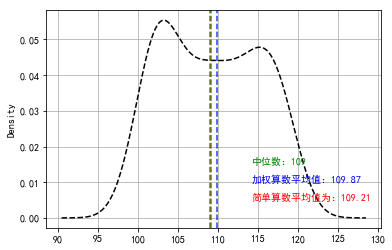

In [6]:
# 1、集中趋势度量
# （2）位置平均数
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题
m = data['value'].mode()
print('众数为',m.tolist())
# 众数是一组数据中出现次数最多的数，这里可能返回多个值
med = data['value'].median()
print('中位数为%i' % med)
# 中位数指将总体各单位标志按照大小顺序排列后，中间位置的数字
data['value'].plot(kind = 'kde',style = '--k',grid = True)
# 密度曲线
plt.axvline(mean,hold=None,color='r',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.005,'简单算数平均值为：%.2f' % mean, color = 'r')
# 简单算数平均值
plt.axvline(mean_w,hold=None,color='b',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.01,'加权算数平均值：%.2f' % mean_w, color = 'b')
# 加权算数平均值
plt.axvline(med,hold=None,color='g',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.015,'中位数：%i' % med, color = 'g')
# 中位数
# **这里三个数text显示的横坐标一致，目的是图示效果不拥挤

In [7]:
# 2、离中趋势度量
# 指一组数据中各数据以不同程度的距离偏离中心的趋势
# 极差与分位差、方差与标准差、离散系数

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据
# A/B销售额量级在同一水平

                A_sale      B_sale
2017-06-01  398.181641  770.060976
2017-06-02  971.215581   72.751920
2017-06-03  256.641024  472.345513
2017-06-04  171.130893  471.227038
2017-06-05  992.255065  165.070976
------


                A_sale      B_sale
2017-06-01  491.978481  420.169659
2017-06-02  493.984017  930.431375
2017-06-03  759.462796  610.208212
2017-06-04  606.355638  744.823757
2017-06-05  822.080366  312.556443
------
A销售额的极差为：951.21, B销售额的极差为：909.20
------
A销售额的分位差为：505.96, B销售额的分位差为：320.02
------


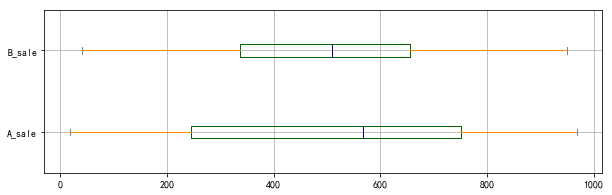

In [8]:
# 2、离中趋势度量
# （1）极差、分位差

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据
# A/B销售额量级在同一水平

a_r = data['A_sale'].max() - data['A_sale'].min()
b_r = data['B_sale'].max() - data['B_sale'].min()
print('A销售额的极差为：%.2f, B销售额的极差为：%.2f' % (a_r,b_r))
print('------')
# 极差
# 没有考虑中间变量的变动，测定离中趋势不稳定

sta = data['A_sale'].describe()
stb = data['B_sale'].describe()
#print(sta)
a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']
print('A销售额的分位差为：%.2f, B销售额的分位差为：%.2f' % (a_iqr,b_iqr))
print('------')
# 分位差

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False,grid = True,color = color,figsize = (10,3))
# 箱型图

A销售额的标准差为：312.81, B销售额的标准差为：264.27
A销售额的方差为：97851.15, B销售额的方差为：69840.51


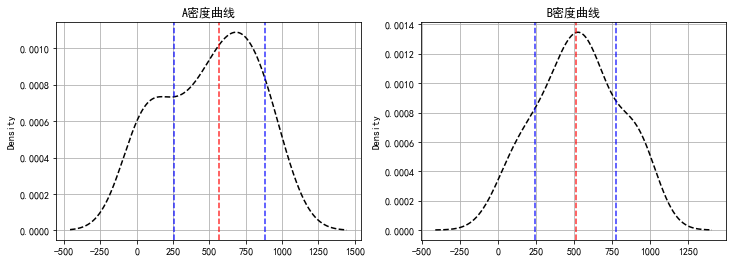

In [10]:
# 2、离中趋势度量
# （2）方差与标准差

a_std = sta.loc['std']
b_std = stb.loc['std']
a_var = data['A_sale'].var()
b_var = data['B_sale'].var()
print('A销售额的标准差为：%.2f, B销售额的标准差为：%.2f' % (a_std,b_std))
print('A销售额的方差为：%.2f, B销售额的方差为：%.2f' % (a_var,b_var))
# 方差 → 各组中数值与算数平均数离差平方的算术平均数
# 标准差 → 方差的平方根
# 标准差是最常用的离中趋势指标 → 标准差越大，离中趋势越明显
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
data['A_sale'].plot(kind = 'kde',style = 'k--',grid = True,title = 'A密度曲线')
plt.axvline(sta.loc['50%'],hold=None,color='r',linestyle="--",alpha=0.8)  
plt.axvline(sta.loc['50%'] - a_std,hold=None,color='b',linestyle="--",alpha=0.8)  
plt.axvline(sta.loc['50%'] + a_std,hold=None,color='b',linestyle="--",alpha=0.8)  
# A密度曲线，1个标准差
ax2 = fig.add_subplot(1,2,2)
data['B_sale'].plot(kind = 'kde',style = 'k--',grid = True,title = 'B密度曲线')
plt.axvline(stb.loc['50%'],hold=None,color='r',linestyle="--",alpha=0.8)  
plt.axvline(stb.loc['50%'] - b_std,hold=None,color='b',linestyle="--",alpha=0.8)  
plt.axvline(stb.loc['50%'] + b_std,hold=None,color='b',linestyle="--",alpha=0.8)  
# B密度曲线，1个标准差